In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
from scipy.optimize import minimize
from skfda import FDataGrid
from skfda.preprocessing.smoothing import BasisSmoother
from skfda.representation.basis import FourierBasis
from skfda.exploratory.visualization import FPCAPlot
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
from joblib import Parallel, delayed
from tqdm import tqdm

C:\Users\sunwoong\AppData\Local\Temp\ipykernel_25092\1557460481.py:13: DeprecationWarning: The module "feature_extraction" is deprecated.Please use "dim_reduction" for FPCAor "feature_construction" for feature construction techniques
  from skfda.preprocessing.dim_reduction.feature_extraction import FPCA


In [14]:
#df= pd.read_csv('full_lv100_0731_no_zeroad.csv',encoding='utf-8')
filtered_df= pd.read_csv('full_lv100_0801_ad.csv',encoding='utf-8')

In [18]:
filtered_df
filtered_df = filtered_df.drop(columns=['total_purchase'])


In [19]:
pivot_data_reset = filtered_df.melt(id_vars=['player_slug', 'total_ad'], var_name='level_to', value_name='interval')


In [20]:
pivot_data_reset

,player_slug,total_ad,level_to,interval
0,2021-11-01T08:32:01.518Z,0.0,2,0.019444
1,2021-11-01T10:41:53.949Z,28.0,2,0.020556
2,2021-11-01T14:12:34.729Z,0.0,2,0.015833
3,2021-11-01T15:01:02.831Z,0.0,2,0.007778
4,2021-11-01T15:10:02.121Z,2.0,2,0.006944
...,...,...,...,...
720616,2022-03-28T00:01:33.666Z,2.0,100,0.600833
720617,2022-03-28T07:44:40.201Z,0.0,100,0.067500
720618,2022-03-28T11:06:23.113Z,0.0,100,0.149722
720619,2022-03-29T09:29:33.653Z,6.0,100,0.102778


In [21]:
from sklearn.preprocessing import StandardScaler
# StandardScaler를 사용하여 정규화
scaler = StandardScaler()
filtered_df['total_ad_normalized'] = scaler.fit_transform(filtered_df[['total_ad']])

In [22]:
filtered_df['total_ad_normalized'].max()

27.380904123204783

In [23]:
pivot_data_reset

,player_slug,total_ad,level_to,interval
0,2021-11-01T08:32:01.518Z,0.0,2,0.019444
1,2021-11-01T10:41:53.949Z,28.0,2,0.020556
2,2021-11-01T14:12:34.729Z,0.0,2,0.015833
3,2021-11-01T15:01:02.831Z,0.0,2,0.007778
4,2021-11-01T15:10:02.121Z,2.0,2,0.006944
...,...,...,...,...
720616,2022-03-28T00:01:33.666Z,2.0,100,0.600833
720617,2022-03-28T07:44:40.201Z,0.0,100,0.067500
720618,2022-03-28T11:06:23.113Z,0.0,100,0.149722
720619,2022-03-29T09:29:33.653Z,6.0,100,0.102778


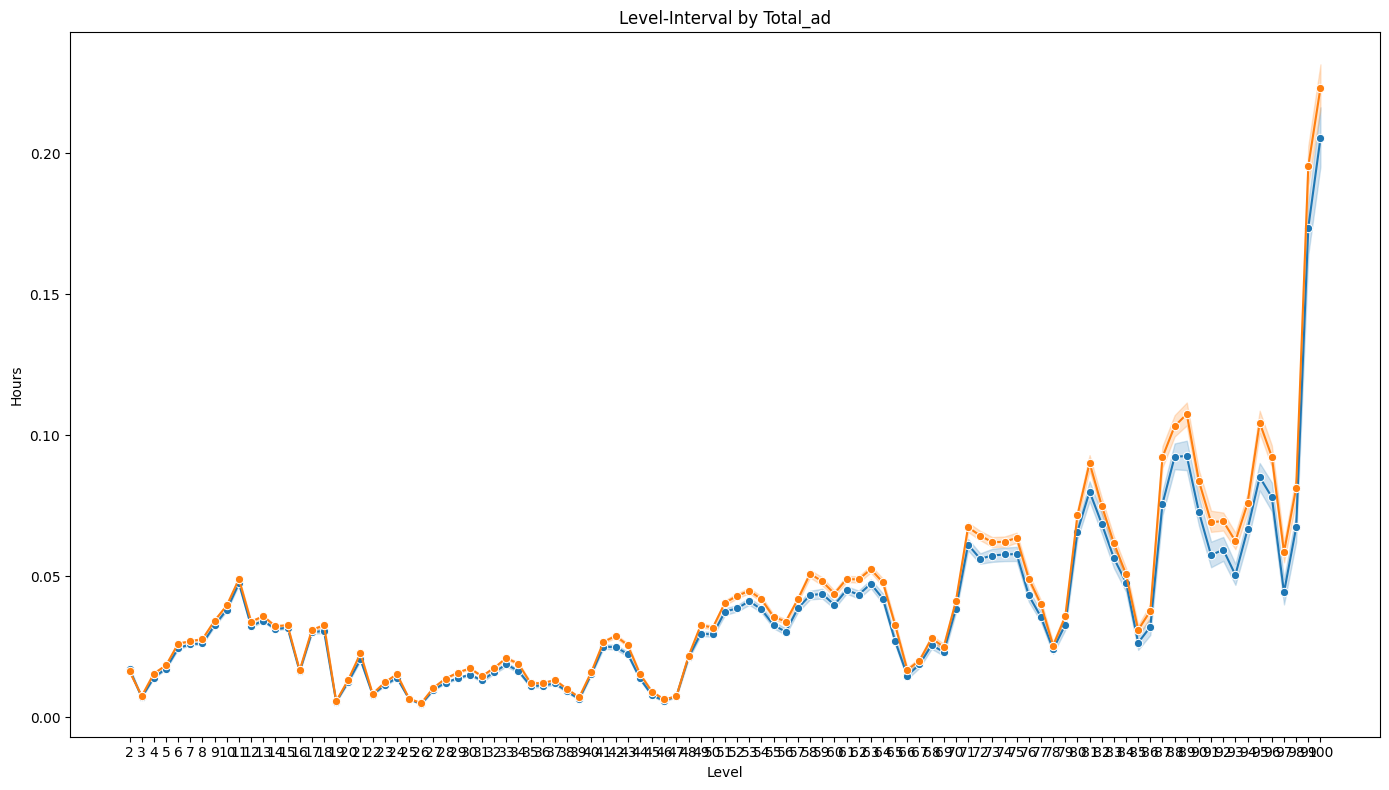

In [24]:
pivot_data_reset['color'] = pivot_data_reset['total_ad'].apply(lambda x: 'blue' if x == 0 else 'red')
# 그래프 그리기
import seaborn as sns
# 플롯 생성
plt.figure(figsize=(14, 8))
sns.lineplot(data=pivot_data_reset, x='level_to', y='interval', hue='color', marker='o', legend=False)

# 플롯 커스터마이징
plt.title('Level-Interval by Total_ad')
plt.xlabel('Level')
plt.ylabel('Hours')

# 플롯 표시
plt.tight_layout()
plt.show()

In [166]:
df=filtered_df
from sklearn.preprocessing import StandardScaler
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm
from scipy.optimize import minimize
from skfda import FDataGrid
from skfda.preprocessing.smoothing import BasisSmoother
from skfda.representation.basis import FourierBasis
from skfda.exploratory.visualization import FPCAPlot
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from skfda.preprocessing.dim_reduction.feature_extraction import FPCA
from joblib import Parallel, delayed
from tqdm import tqdm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from skfda import FDataGrid
from skfda.preprocessing.dim_reduction import FPCA
from skfda.representation.basis import BSplineBasis
from sklearn.preprocessing import StandardScaler
from statsmodels.regression.linear_model import OLS
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
# total_purchase가 포함된 행만 선택
# total_purchase가 포함된 행만 선택
player_slugs = df['player_slug'].copy()
df = df.drop(columns=['player_slug'])
df = df.drop(columns=['total_ad_normalized'])
df = df.dropna(subset=['total_ad'])


,2,3,4,5,6,7,8,9,10,11,...,92,93,94,95,96,97,98,99,100,total_ad
0,0.019444,0.004167,0.009444,0.015833,0.015278,0.020833,0.026667,0.034167,0.044722,0.059167,...,0.069722,0.063056,0.115556,0.152222,0.003333,0.003889,0.132667,0.906944,0.914500,0.0
1,0.020556,0.004167,0.006111,0.006667,0.019722,0.021389,0.023056,0.030278,0.032778,0.041667,...,0.045278,0.003889,0.123833,0.095833,0.157500,0.002500,0.127944,0.401944,0.514722,28.0
2,0.015833,0.004444,0.030278,0.013889,0.028056,0.020000,0.021389,0.026389,0.032778,0.041944,...,0.046111,0.051944,0.011667,0.064500,0.351111,0.041611,0.111389,0.002222,0.001944,0.0
3,0.007778,0.003056,0.006389,0.009722,0.012500,0.049722,0.070833,0.036222,0.032500,0.042222,...,0.077222,0.003611,0.043944,0.236111,0.036111,0.002778,0.126667,0.121111,0.135556,0.0
4,0.006944,0.003611,0.010833,0.015000,0.023056,0.022778,0.022500,0.048333,0.031667,0.036667,...,0.035556,0.129722,0.004167,0.199111,0.065222,0.024167,0.003333,0.070611,0.250556,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7274,0.006667,0.003333,0.008333,0.013889,0.019444,0.021667,0.021111,0.024722,0.030278,0.047500,...,0.060889,0.048611,0.021389,0.090556,0.083333,0.002222,0.002222,0.036444,0.600833,2.0
7275,0.006944,0.003056,0.005833,0.012500,0.012500,0.021667,0.021389,0.027222,0.036944,0.037778,...,0.127722,0.096944,0.674444,0.759722,0.876389,0.136778,0.171667,0.043056,0.067500,0.0
7276,0.006389,0.005278,0.012222,0.021944,0.031389,0.026667,0.024722,0.033889,0.035556,0.050833,...,0.040778,0.032222,0.020278,0.081389,0.080000,0.002778,0.002778,0.071167,0.149722,0.0
7277,0.031389,0.031111,0.047222,0.029722,0.037778,0.020556,0.023778,0.026111,0.032222,0.042222,...,0.028611,0.007778,0.046389,0.049167,0.002778,0.002778,0.023444,0.093333,0.102778,6.0


In [174]:


# X (타임라인 데이터)와 y (total_purchase) 분리
y = df['total_ad'].values
X = df.drop(columns=['total_ad'])
# 함수형 데이터 객체 생성
argvals = np.arange(X.shape[1])
fd = FDataGrid(data_matrix=X.values, grid_points=argvals)

# 데이터 스케일링 및 B-spline 기반 스무딩
scaler = StandardScaler()
basis = BSplineBasis(n_basis=4)

smoother = BasisSmoother(basis=basis)
fd_smooth = smoother.fit_transform(fd)
#fd_smooth.data_matrix[fd_smooth.data_matrix < 0] = 0


In [175]:
basis

BSplineBasis(domain_range=((0.0, 1.0),), n_basis=4, order=4, knots=(0.0, 1.0))

In [176]:
# FPCA 적용
fpca = FPCA(n_components=3)
fd_fpca = fpca.fit_transform(fd_smooth)

# 주성분 설명 분산
explained_variance = fpca.explained_variance_ratio_
print("Explained variance ratio by each component:", explained_variance)


Explained variance ratio by each component: [0.84612598 0.13647844 0.01447329]


C:\Users\sunwoong\AppData\Local\Temp\ipykernel_25092\2843850041.py:3: DeprecationWarning: The method 'evaluate' is deprecated. Please use the normal calling notation on the functional data object instead.
  plt.plot(argvals, fpca.components_[i].evaluate(argvals)[0], label=f'Principal Component {i+1}')


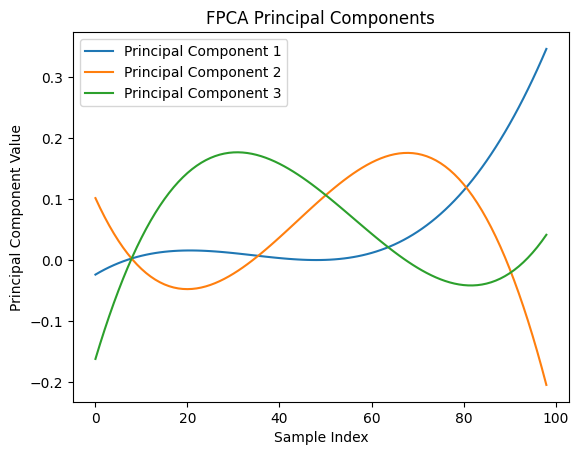

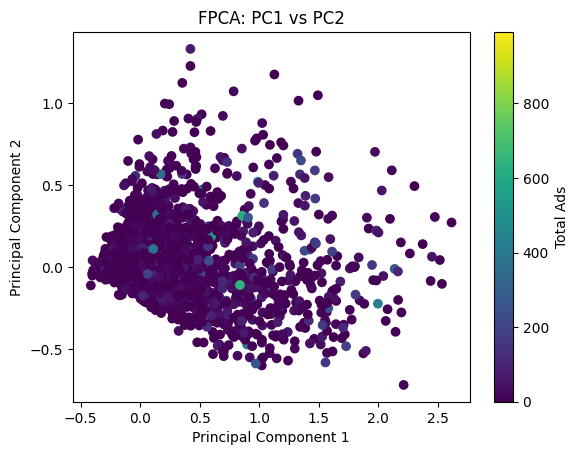

In [177]:
# 주성분 시각화
for i in range(3):
    plt.plot(argvals, fpca.components_[i].evaluate(argvals)[0], label=f'Principal Component {i+1}')

plt.xlabel('Sample Index')
plt.ylabel('Principal Component Value')
plt.title('FPCA Principal Components')
plt.legend()
plt.show()



# 주성분 점수 플롯
plt.scatter(fd_fpca[:, 0], fd_fpca[:, 1], c=y, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('FPCA: PC1 vs PC2')
plt.colorbar(label='Total Ads')
plt.show()


c:\Users\sunwoong\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


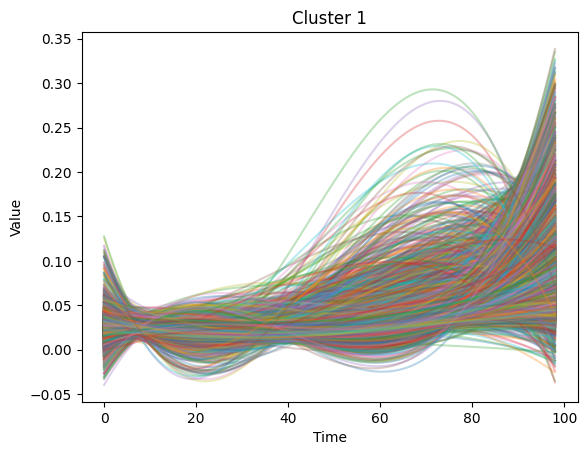

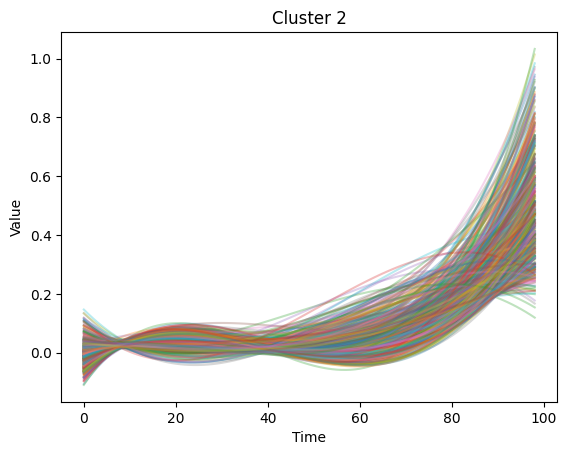

Cluster labels: [0 0 0 ... 0 0 0]


In [178]:

# 함수형 K-평균 클러스터링 수행
kmeans = KMeans(n_clusters=2, random_state=123)
labels = kmeans.fit_predict(fd_fpca)

# 클러스터링 결과 시각화
for i in range(2):
    cluster_indices = np.where(labels == i)[0]
    plt.figure()
    for index in cluster_indices:
        plt.plot(argvals, fd_smooth.data_matrix[index].flatten(), alpha=0.3)
    plt.title(f'Cluster {i + 1}')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.show()

# 클러스터 할당 결과 확인
print("Cluster labels:", labels)

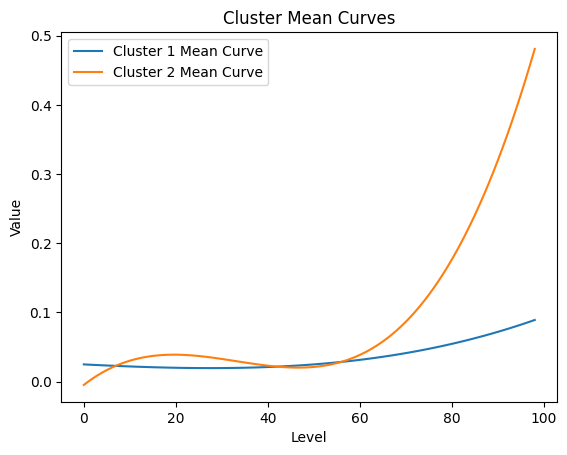

In [179]:
# 클러스터별 평균 곡선 계산 및 시각화
for i in range(2):
    cluster_indices = np.where(labels == i)[0]
    cluster_data = fd_smooth.data_matrix[cluster_indices]
    mean_curve = np.mean(cluster_data, axis=0).flatten()
    plt.plot(argvals, mean_curve, label=f'Cluster {i + 1} Mean Curve')
plt.title('Cluster Mean Curves')
plt.xlabel('Level')
plt.ylabel('Value')
plt.legend()
plt.show()

In [181]:
# 클러스터 라벨을 원래 데이터프레임에 추가
df['Cluster'] = labels

# 필요 시 player_slug와 결합
df['player_slug'] = player_slugs

# 결과 확인
df['total_ad']=y

In [182]:
df

,2,3,4,5,6,7,8,9,10,11,...,94,95,96,97,98,99,100,total_ad,Cluster,player_slug
0,0.019444,0.004167,0.009444,0.015833,0.015278,0.020833,0.026667,0.034167,0.044722,0.059167,...,0.115556,0.152222,0.003333,0.003889,0.132667,0.906944,0.914500,0.0,0,2021-11-01T08:32:01.518Z
1,0.020556,0.004167,0.006111,0.006667,0.019722,0.021389,0.023056,0.030278,0.032778,0.041667,...,0.123833,0.095833,0.157500,0.002500,0.127944,0.401944,0.514722,28.0,0,2021-11-01T10:41:53.949Z
2,0.015833,0.004444,0.030278,0.013889,0.028056,0.020000,0.021389,0.026389,0.032778,0.041944,...,0.011667,0.064500,0.351111,0.041611,0.111389,0.002222,0.001944,0.0,0,2021-11-01T14:12:34.729Z
3,0.007778,0.003056,0.006389,0.009722,0.012500,0.049722,0.070833,0.036222,0.032500,0.042222,...,0.043944,0.236111,0.036111,0.002778,0.126667,0.121111,0.135556,0.0,0,2021-11-01T15:01:02.831Z
4,0.006944,0.003611,0.010833,0.015000,0.023056,0.022778,0.022500,0.048333,0.031667,0.036667,...,0.004167,0.199111,0.065222,0.024167,0.003333,0.070611,0.250556,2.0,0,2021-11-01T15:10:02.121Z
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7274,0.006667,0.003333,0.008333,0.013889,0.019444,0.021667,0.021111,0.024722,0.030278,0.047500,...,0.021389,0.090556,0.083333,0.002222,0.002222,0.036444,0.600833,2.0,0,2022-03-28T00:01:33.666Z
7275,0.006944,0.003056,0.005833,0.012500,0.012500,0.021667,0.021389,0.027222,0.036944,0.037778,...,0.674444,0.759722,0.876389,0.136778,0.171667,0.043056,0.067500,0.0,1,2022-03-28T07:44:40.201Z
7276,0.006389,0.005278,0.012222,0.021944,0.031389,0.026667,0.024722,0.033889,0.035556,0.050833,...,0.020278,0.081389,0.080000,0.002778,0.002778,0.071167,0.149722,0.0,0,2022-03-28T11:06:23.113Z
7277,0.031389,0.031111,0.047222,0.029722,0.037778,0.020556,0.023778,0.026111,0.032222,0.042222,...,0.046389,0.049167,0.002778,0.002778,0.023444,0.093333,0.102778,6.0,0,2022-03-29T09:29:33.653Z


In [183]:
columns = ['player_slug', 'Cluster'] + [col for col in df.columns if col not in ['player_slug', 'Cluster']]
df = df[columns]
df.to_csv("Binge&Cluster.csv",encoding='utf-8',index=False)

,player_slug,Cluster,2,3,4,5,6,7,8,9,...,92,93,94,95,96,97,98,99,100,total_ad
0,2021-11-01T08:32:01.518Z,0,0.019444,0.004167,0.009444,0.015833,0.015278,0.020833,0.026667,0.034167,...,0.069722,0.063056,0.115556,0.152222,0.003333,0.003889,0.132667,0.906944,0.914500,0.0
1,2021-11-01T10:41:53.949Z,0,0.020556,0.004167,0.006111,0.006667,0.019722,0.021389,0.023056,0.030278,...,0.045278,0.003889,0.123833,0.095833,0.157500,0.002500,0.127944,0.401944,0.514722,28.0
2,2021-11-01T14:12:34.729Z,0,0.015833,0.004444,0.030278,0.013889,0.028056,0.020000,0.021389,0.026389,...,0.046111,0.051944,0.011667,0.064500,0.351111,0.041611,0.111389,0.002222,0.001944,0.0
3,2021-11-01T15:01:02.831Z,0,0.007778,0.003056,0.006389,0.009722,0.012500,0.049722,0.070833,0.036222,...,0.077222,0.003611,0.043944,0.236111,0.036111,0.002778,0.126667,0.121111,0.135556,0.0
4,2021-11-01T15:10:02.121Z,0,0.006944,0.003611,0.010833,0.015000,0.023056,0.022778,0.022500,0.048333,...,0.035556,0.129722,0.004167,0.199111,0.065222,0.024167,0.003333,0.070611,0.250556,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7274,2022-03-28T00:01:33.666Z,0,0.006667,0.003333,0.008333,0.013889,0.019444,0.021667,0.021111,0.024722,...,0.060889,0.048611,0.021389,0.090556,0.083333,0.002222,0.002222,0.036444,0.600833,2.0
7275,2022-03-28T07:44:40.201Z,1,0.006944,0.003056,0.005833,0.012500,0.012500,0.021667,0.021389,0.027222,...,0.127722,0.096944,0.674444,0.759722,0.876389,0.136778,0.171667,0.043056,0.067500,0.0
7276,2022-03-28T11:06:23.113Z,0,0.006389,0.005278,0.012222,0.021944,0.031389,0.026667,0.024722,0.033889,...,0.040778,0.032222,0.020278,0.081389,0.080000,0.002778,0.002778,0.071167,0.149722,0.0
7277,2022-03-29T09:29:33.653Z,0,0.031389,0.031111,0.047222,0.029722,0.037778,0.020556,0.023778,0.026111,...,0.028611,0.007778,0.046389,0.049167,0.002778,0.002778,0.023444,0.093333,0.102778,6.0


In [190]:
df.to_csv("Binge&Cluster.csv",encoding='utf-8',index=False)
df.to_csv("Binge&Cluster_cp.csv",encoding='cp949',index=False)

In [186]:
binge_df= pd.read_csv('new_binge.csv',encoding='cp949')
binge_df=binge_df[['player_slug','binge']]

In [188]:
df_unique = binge_df.drop_duplicates(subset=['player_slug'])
df_unique

,player_slug,binge
0,2021-10-31T16:01:57.631Z,1
6,2021-10-31T23:13:52.512Z,0
15,2021-11-01T00:29:22.357Z,0
21,2021-11-01T03:34:17.980Z,0
28,2021-11-01T05:12:15.383Z,0
...,...,...
2466886,2022-03-30T13:53:30.032Z,0
2466934,2022-03-30T14:09:03.502Z,0
2466945,2022-03-30T14:13:23.546Z,0
2466966,2022-03-30T14:20:04.049Z,0


In [189]:
merged_df = df.merge(df_unique, on='player_slug', how='left')
merged_df

,player_slug,Cluster,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,total_ad,binge
0,2021-11-01T08:32:01.518Z,0,0.019444,0.004167,0.009444,0.015833,0.015278,0.020833,0.026667,0.034167,...,0.063056,0.115556,0.152222,0.003333,0.003889,0.132667,0.906944,0.914500,0.0,1
1,2021-11-01T10:41:53.949Z,0,0.020556,0.004167,0.006111,0.006667,0.019722,0.021389,0.023056,0.030278,...,0.003889,0.123833,0.095833,0.157500,0.002500,0.127944,0.401944,0.514722,28.0,1
2,2021-11-01T14:12:34.729Z,0,0.015833,0.004444,0.030278,0.013889,0.028056,0.020000,0.021389,0.026389,...,0.051944,0.011667,0.064500,0.351111,0.041611,0.111389,0.002222,0.001944,0.0,1
3,2021-11-01T15:01:02.831Z,0,0.007778,0.003056,0.006389,0.009722,0.012500,0.049722,0.070833,0.036222,...,0.003611,0.043944,0.236111,0.036111,0.002778,0.126667,0.121111,0.135556,0.0,1
4,2021-11-01T15:10:02.121Z,0,0.006944,0.003611,0.010833,0.015000,0.023056,0.022778,0.022500,0.048333,...,0.129722,0.004167,0.199111,0.065222,0.024167,0.003333,0.070611,0.250556,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7274,2022-03-28T00:01:33.666Z,0,0.006667,0.003333,0.008333,0.013889,0.019444,0.021667,0.021111,0.024722,...,0.048611,0.021389,0.090556,0.083333,0.002222,0.002222,0.036444,0.600833,2.0,1
7275,2022-03-28T07:44:40.201Z,1,0.006944,0.003056,0.005833,0.012500,0.012500,0.021667,0.021389,0.027222,...,0.096944,0.674444,0.759722,0.876389,0.136778,0.171667,0.043056,0.067500,0.0,1
7276,2022-03-28T11:06:23.113Z,0,0.006389,0.005278,0.012222,0.021944,0.031389,0.026667,0.024722,0.033889,...,0.032222,0.020278,0.081389,0.080000,0.002778,0.002778,0.071167,0.149722,0.0,1
7277,2022-03-29T09:29:33.653Z,0,0.031389,0.031111,0.047222,0.029722,0.037778,0.020556,0.023778,0.026111,...,0.007778,0.046389,0.049167,0.002778,0.002778,0.023444,0.093333,0.102778,6.0,1


In [191]:
merged_df.to_csv("Binge&Cluster.csv",encoding='utf-8',index=False)
merged_df.to_csv("Binge&Cluster_cp.csv",encoding='cp949',index=False)

In [192]:
merged_df

,player_slug,Cluster,2,3,4,5,6,7,8,9,...,93,94,95,96,97,98,99,100,total_ad,binge
0,2021-11-01T08:32:01.518Z,0,0.019444,0.004167,0.009444,0.015833,0.015278,0.020833,0.026667,0.034167,...,0.063056,0.115556,0.152222,0.003333,0.003889,0.132667,0.906944,0.914500,0.0,1
1,2021-11-01T10:41:53.949Z,0,0.020556,0.004167,0.006111,0.006667,0.019722,0.021389,0.023056,0.030278,...,0.003889,0.123833,0.095833,0.157500,0.002500,0.127944,0.401944,0.514722,28.0,1
2,2021-11-01T14:12:34.729Z,0,0.015833,0.004444,0.030278,0.013889,0.028056,0.020000,0.021389,0.026389,...,0.051944,0.011667,0.064500,0.351111,0.041611,0.111389,0.002222,0.001944,0.0,1
3,2021-11-01T15:01:02.831Z,0,0.007778,0.003056,0.006389,0.009722,0.012500,0.049722,0.070833,0.036222,...,0.003611,0.043944,0.236111,0.036111,0.002778,0.126667,0.121111,0.135556,0.0,1
4,2021-11-01T15:10:02.121Z,0,0.006944,0.003611,0.010833,0.015000,0.023056,0.022778,0.022500,0.048333,...,0.129722,0.004167,0.199111,0.065222,0.024167,0.003333,0.070611,0.250556,2.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7274,2022-03-28T00:01:33.666Z,0,0.006667,0.003333,0.008333,0.013889,0.019444,0.021667,0.021111,0.024722,...,0.048611,0.021389,0.090556,0.083333,0.002222,0.002222,0.036444,0.600833,2.0,1
7275,2022-03-28T07:44:40.201Z,1,0.006944,0.003056,0.005833,0.012500,0.012500,0.021667,0.021389,0.027222,...,0.096944,0.674444,0.759722,0.876389,0.136778,0.171667,0.043056,0.067500,0.0,1
7276,2022-03-28T11:06:23.113Z,0,0.006389,0.005278,0.012222,0.021944,0.031389,0.026667,0.024722,0.033889,...,0.032222,0.020278,0.081389,0.080000,0.002778,0.002778,0.071167,0.149722,0.0,1
7277,2022-03-29T09:29:33.653Z,0,0.031389,0.031111,0.047222,0.029722,0.037778,0.020556,0.023778,0.026111,...,0.007778,0.046389,0.049167,0.002778,0.002778,0.023444,0.093333,0.102778,6.0,1


In [193]:
# Cluster별로 그룹화하여 'binge' 열의 비율을 계산
binge_ratios = merged_df.groupby('Cluster')['binge'].value_counts(normalize=True).unstack()

# 결과 확인
print(binge_ratios)


binge           0         1
Cluster                    
0        0.493769  0.506231
1        0.374768  0.625232


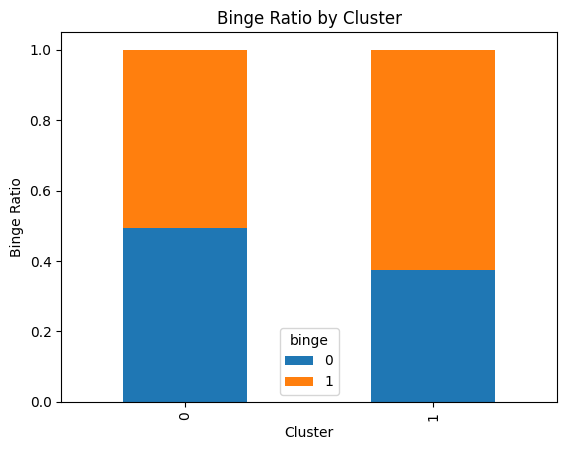

In [194]:
import matplotlib.pyplot as plt

# 막대그래프 그리기
binge_ratios.plot(kind='bar', stacked=True)
plt.title('Binge Ratio by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Binge Ratio')
plt.show()
